In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from acquire import *
from prepare import *
from explore import *
from wrangle import *



from sklearn.model_selection import train_test_split

#Settting matplotlib/seaborn defaults
plt.rc('figure', figsize=(16, 8))
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.rcParams['axes.axisbelow'] = True
plt.rc('font', size=16)

## Acquire Merged Data Frame

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = wrangle_merged_df()
df.head()

Using cached csv


,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,district,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,pd_district,the_geom,objectid,district_name,sort_order,battalion_id,jurisdiction_id,color,code,external_key,battalion_code,sector_name,input_date,modified_date,input_by,modified_by,bureau_name,patrol_area,command_phone_number,primary_key,shape_area,shape_length
0,ASSAULT ON PUBLIC SERVANT,N,2021-12-31 23:50:00,2021-12-31,2021-12-31 23:50:00,2021-12-31,COMMERCIAL / OFFICE BUILDING,111 CONGRESS AVE,78701.0,9.0,GEORGE,3,30.263739,-97.743651,cleared by arrest,2022-01-03,True,0 days 00:00:00,GEORGE 3,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",39,GEORGE 3,1,194,15,16776960,1299,1299,G1,GEORGE,12/22/2014 11:31:16 AM +0000,03/03/2017 08:32:07 AM +0000,bmartinlimuel,ap7657,NORTH,DTAC,512-974-5203,12,8.371570e+06,14491.846845
1,ASSAULT BY CONTACT,N,2021-12-31 12:45:00,2021-12-31,2022-01-04 17:07:00,2022-01-04,BAR / NIGHTCLUB,78 RAINEY ST,78701.0,9.0,GEORGE,3,30.259087,-97.738973,not cleared,2022-02-28,False,4 days 04:22:00,GEORGE 3,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",39,GEORGE 3,1,194,15,16776960,1299,1299,G1,GEORGE,12/22/2014 11:31:16 AM +0000,03/03/2017 08:32:07 AM +0000,bmartinlimuel,ap7657,NORTH,DTAC,512-974-5203,12,8.371570e+06,14491.846845
2,ASSAULT WITH INJURY,N,2021-12-31 11:00:00,2021-12-31,2022-01-05 19:17:00,2022-01-05,RESIDENCE / HOME,51 RAINEY ST,78701.0,9.0,GEORGE,3,30.256806,-97.739177,not cleared,2022-01-12,False,5 days 08:17:00,GEORGE 3,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",39,GEORGE 3,1,194,15,16776960,1299,1299,G1,GEORGE,12/22/2014 11:31:16 AM +0000,03/03/2017 08:32:07 AM +0000,bmartinlimuel,ap7657,NORTH,DTAC,512-974-5203,12,8.371570e+06,14491.846845
3,THEFT,N,2021-12-31 02:00:00,2021-12-31,2022-02-01 22:52:00,2022-02-01,BAR / NIGHTCLUB,76 RAINEY ST,78701.0,9.0,GEORGE,3,30.258917,-97.739019,not cleared,2022-03-14,False,32 days 20:52:00,GEORGE 3,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",39,GEORGE 3,1,194,15,16776960,1299,1299,G1,GEORGE,12/22/2014 11:31:16 AM +0000,03/03/2017 08:32:07 AM +0000,bmartinlimuel,ap7657,NORTH,DTAC,512-974-5203,12,8.371570e+06,14491.846845
4,ASSAULT BY CONTACT,N,2021-12-30 08:29:00,2021-12-30,2021-12-30 08:29:00,2021-12-30,HOTEL / MOTEL / ETC.,20 N IH 35 SVRD SB,78701.0,9.0,GEORGE,3,30.253701,-97.737144,not cleared,2022-01-05,False,0 days 00:00:00,GEORGE 3,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",39,GEORGE 3,1,194,15,16776960,1299,1299,G1,GEORGE,12/22/2014 11:31:16 AM +0000,03/03/2017 08:32:07 AM +0000,bmartinlimuel,ap7657,NORTH,DTAC,512-974-5203,12,8.371570e+06,14491.846845


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352931 entries, 0 to 352930
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   crime_type            352931 non-null  object         
 1   family_violence       352931 non-null  object         
 2   occurrence_time       352931 non-null  datetime64[ns] 
 3   occurrence_date       352931 non-null  datetime64[ns] 
 4   report_time           352931 non-null  datetime64[ns] 
 5   report_date           352931 non-null  datetime64[ns] 
 6   location_type         352931 non-null  object         
 7   address               352931 non-null  object         
 8   zip_code              352931 non-null  float64        
 9   council_district      352931 non-null  float64        
 10  sector                352931 non-null  object         
 11  district              352931 non-null  object         
 12  latitude              352931 non-null  float

## Univariate Exploration

**Let's look at distributions of some of the new columns.**

In [5]:
## First let me create a subset data frame with just the columns I want to look at in order to call my plot_distributions column
columns_to_explore = ['pd_district', 'district_name', 'battalion_id', 'jurisdiction_id', 'sector_name', 'bureau_name', 'patrol_area']
univariate_df = df[columns_to_explore]
univariate_df.head()

,pd_district,district_name,battalion_id,jurisdiction_id,sector_name,bureau_name,patrol_area
0,GEORGE 3,GEORGE 3,194,15,GEORGE,NORTH,DTAC
1,GEORGE 3,GEORGE 3,194,15,GEORGE,NORTH,DTAC
2,GEORGE 3,GEORGE 3,194,15,GEORGE,NORTH,DTAC
3,GEORGE 3,GEORGE 3,194,15,GEORGE,NORTH,DTAC
4,GEORGE 3,GEORGE 3,194,15,GEORGE,NORTH,DTAC


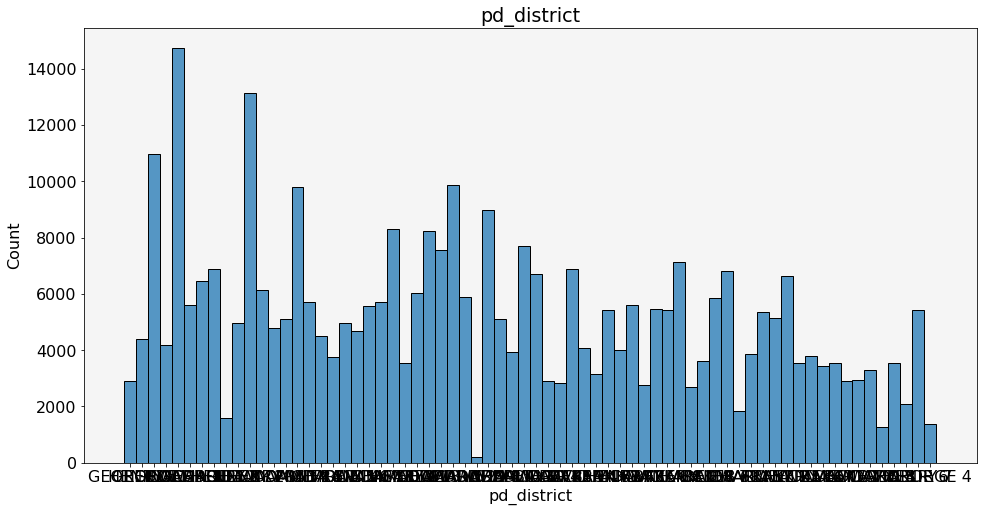

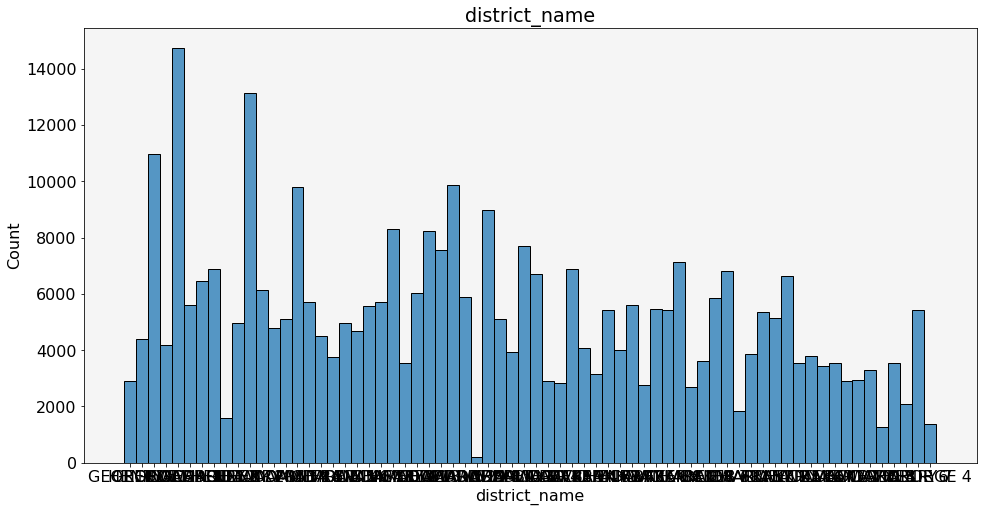

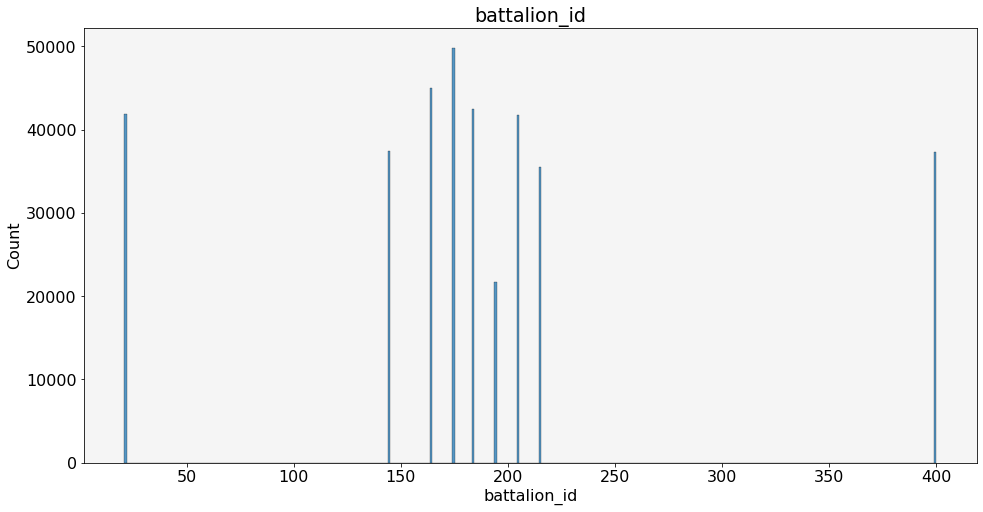

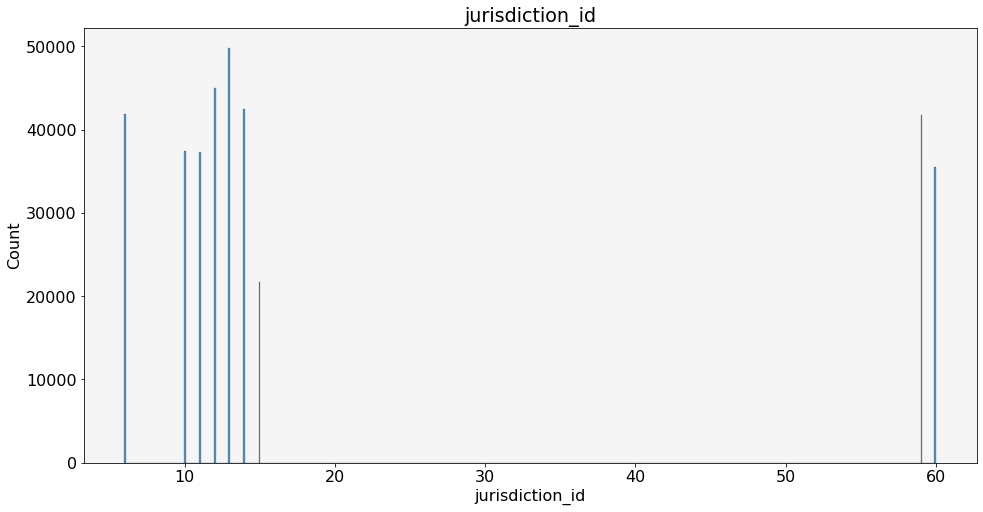

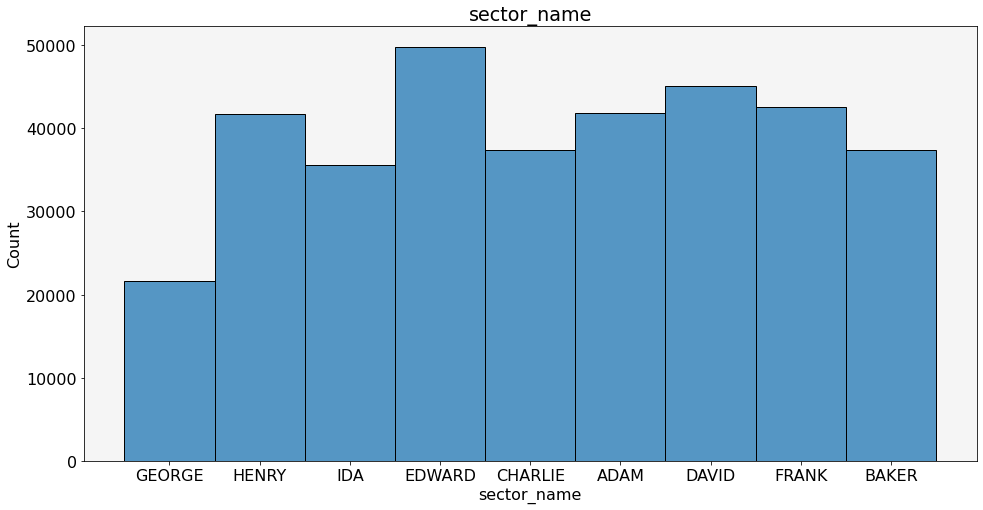

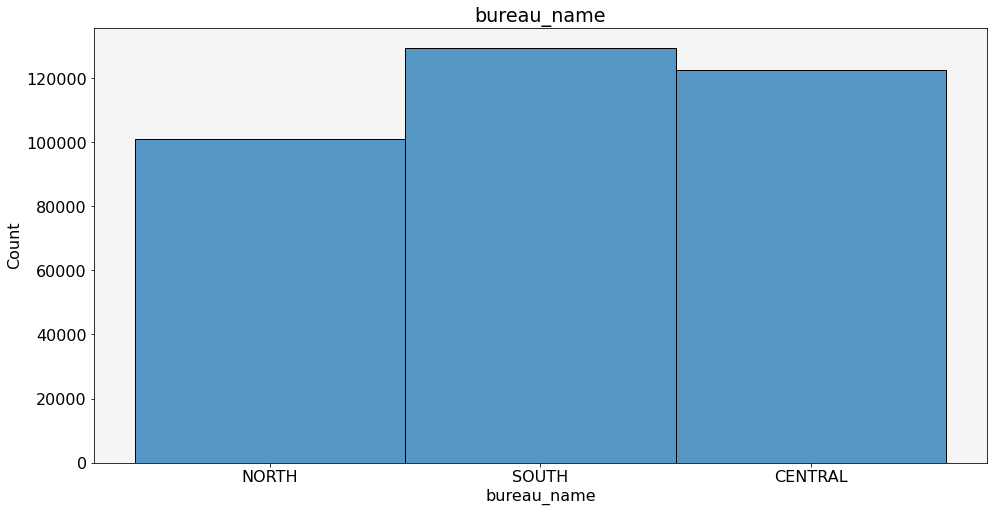

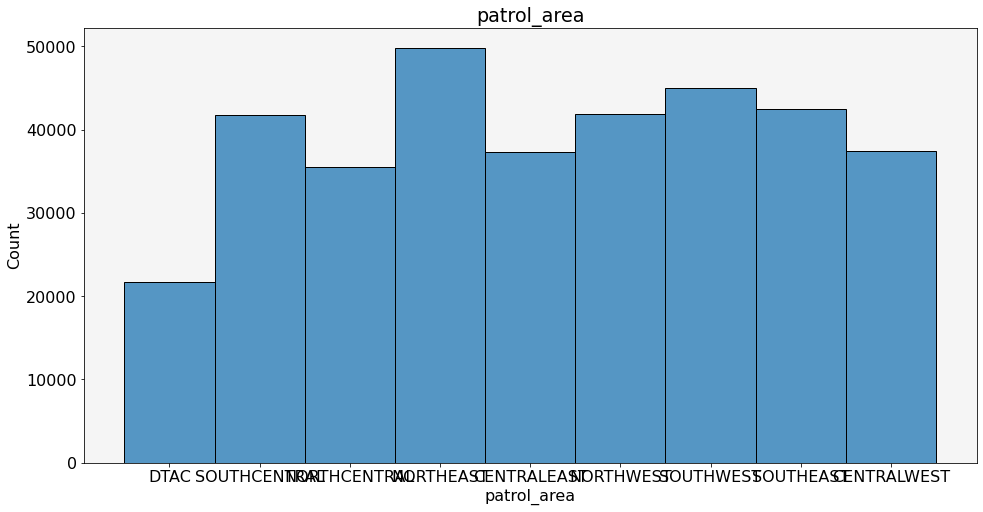

In [6]:
plot_distributions(univariate_df)

**We have generally uniform distributions for these features but there are also clearly some jurisdictions, sectors, battalions, patrol ares, etc. that get higher levels of crime. The data types of some features are making them display strangely. I need to make sure I change them to the appropirate type.**

### Change Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352931 entries, 0 to 352930
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   crime_type            352931 non-null  object         
 1   family_violence       352931 non-null  object         
 2   occurrence_time       352931 non-null  datetime64[ns] 
 3   occurrence_date       352931 non-null  datetime64[ns] 
 4   report_time           352931 non-null  datetime64[ns] 
 5   report_date           352931 non-null  datetime64[ns] 
 6   location_type         352931 non-null  object         
 7   address               352931 non-null  object         
 8   zip_code              352931 non-null  float64        
 9   council_district      352931 non-null  float64        
 10  sector                352931 non-null  object         
 11  district              352931 non-null  object         
 12  latitude              352931 non-null  float

In [8]:
df.battalion_id.value_counts()

174    49760
164    45033
184    42534
21     41851
205    41761
144    37392
400    37344
215    35559
194    21697
Name: battalion_id, dtype: int64

In [9]:
df.battalion_code.value_counts()

E1      49760
D1      45033
F1      42534
A1      41851
H1      41761
B1      37392
CHAR    37344
I1      35559
G1      21697
Name: battalion_code, dtype: int64

**Battalion code and id seem to be exactly duplicated.**

In [10]:
df.jurisdiction_id.value_counts()

13    49760
12    45033
14    42534
6     41851
59    41761
10    37392
11    37344
60    35559
15    21697
Name: jurisdiction_id, dtype: int64

In [11]:
df.color.value_counts() # Really not sure what this means

16711680    102417
16711808    100790
16744448     84385
16744576     43642
16776960     21697
Name: color, dtype: int64

In [12]:
df.bureau_name.value_counts()

SOUTH      129328
CENTRAL    122663
NORTH      100940
Name: bureau_name, dtype: int64

**Columns that need data types changed: battalion_id, jurisdiction_id, code.**

In [13]:
df.battalion_id = df.battalion_id.astype('object')
df.jurisdiction_id = df.jurisdiction_id.astype('object')
df.code = df.code.astype('object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352931 entries, 0 to 352930
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   crime_type            352931 non-null  object         
 1   family_violence       352931 non-null  object         
 2   occurrence_time       352931 non-null  datetime64[ns] 
 3   occurrence_date       352931 non-null  datetime64[ns] 
 4   report_time           352931 non-null  datetime64[ns] 
 5   report_date           352931 non-null  datetime64[ns] 
 6   location_type         352931 non-null  object         
 7   address               352931 non-null  object         
 8   zip_code              352931 non-null  float64        
 9   council_district      352931 non-null  float64        
 10  sector                352931 non-null  object         
 11  district              352931 non-null  object         
 12  latitude              352931 non-null  float

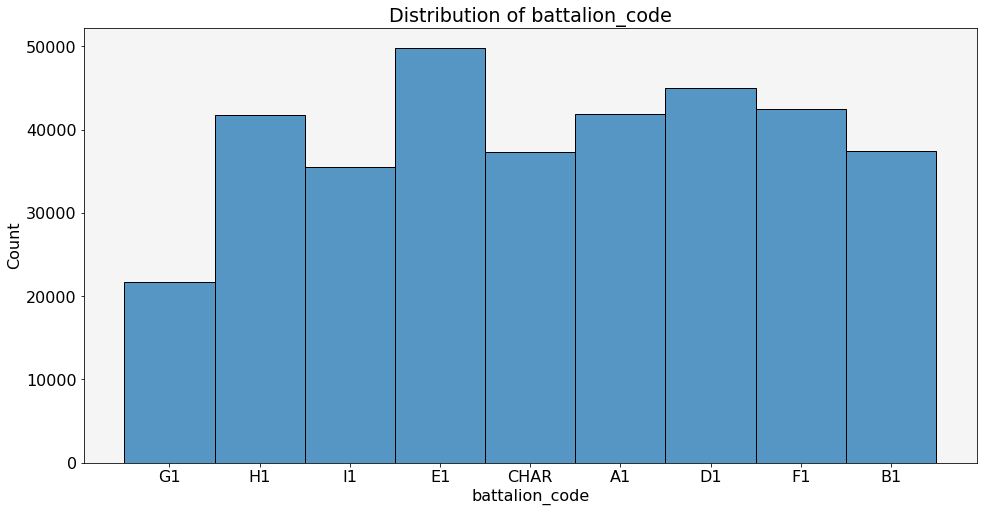

In [15]:
plot_distribution(df, 'battalion_code')

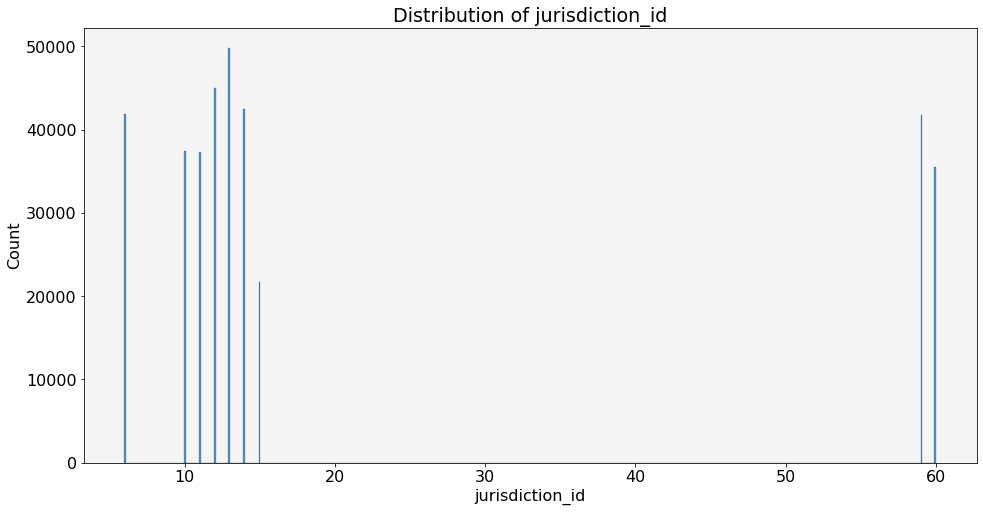

In [16]:
plot_distribution(df, 'jurisdiction_id')

## Split the Data Before Multivariate Analysis

In [17]:
train, validate, test = split_data(df)
train.shape, validate.shape, test.shape

((197640, 40), (84704, 40), (70587, 40))

## Exploration

### Question 1: Is clearance rate dependent on patrol area?

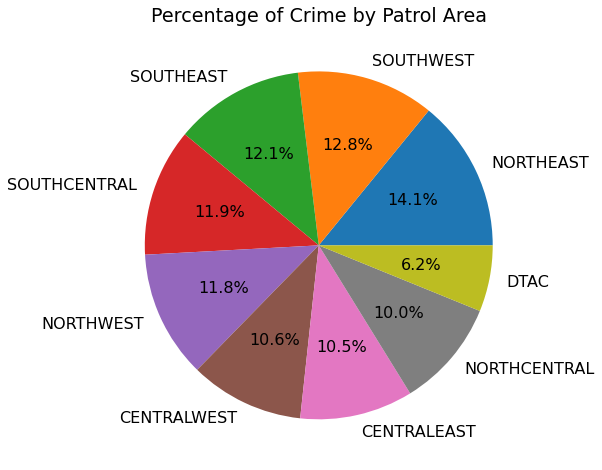

In [18]:
# create pie chart - I dont think this viz is doing what I want it to do
train.patrol_area.value_counts().plot(kind='pie', autopct="%1.1f%%")
# remove y axis label
plt.ylabel(None)
#add title
plt.title('Percentage of Crime by Patrol Area')
plt.show()

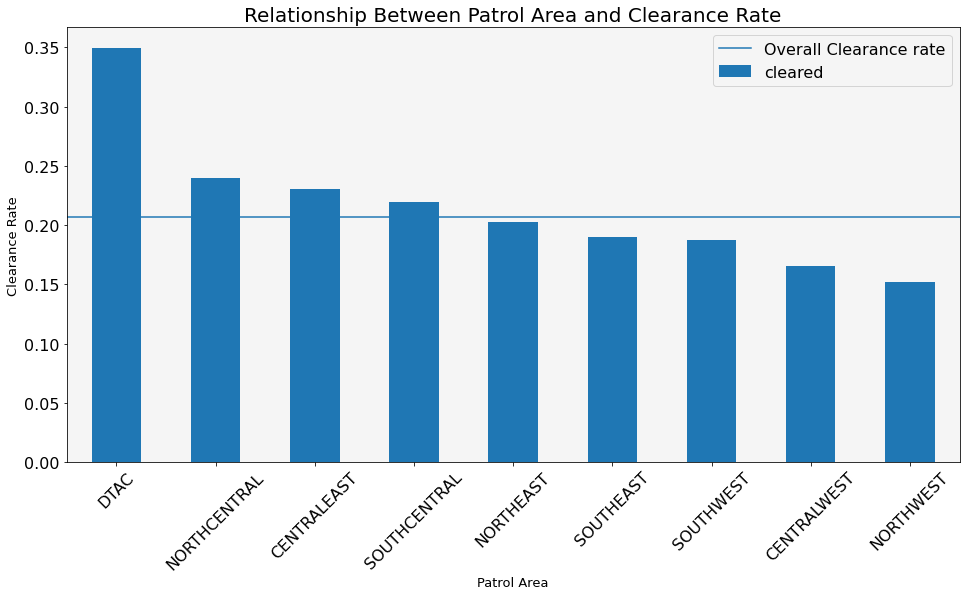

In [19]:
# Calculate overall clearance rate
clearance_rate = train.cleared.mean()
# Plot the relationship
plt.title("Relationship Between Patrol Area and Clearance Rate", fontsize=20)
train.groupby('patrol_area').cleared.mean().sort_values(ascending=False).plot.bar()
plt.axhline(clearance_rate, label="Overall Clearance rate")
plt.ylabel('Clearance Rate', fontsize=13)
plt.xlabel('Patrol Area', fontsize=13)
plt.xticks(rotation = 45) #Rotating the xticks 45 degrees for readability
plt.legend()
None

**Takeaways:**
- It look like DTAC (Downtown Area Command) has significantly higher clearance rate -- Is this simply because theres more crime there or more resources allocated there?
- All the western patrol areas have the lowerst clearance rates while the east and central areas are generally higher.


**I'll run a quick chi^2 test to confirm the statistical dependency.**

$H0$: Patrol area and clearance are independent of eachother. 

$Ha$: Patrol area and clearance are dependent on eachother.

*Setting my confidence level at 95% which makes my alpha = .05*

In [20]:
target = train.cleared
chi2(train.patrol_area, target)

The chi2 value between the two variables is 2478.925731657861 and the P-Value is 0.0.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


**Let's look at the top crimes in each patrol area...**

In [66]:
train.groupby('patrol_area').crime_type.value_counts().sort_values(ascending=False)

patrol_area   crime_type                 
CENTRALWEST   BURGLARY OF VEHICLE            3027
SOUTHWEST     BURGLARY OF VEHICLE            3008
NORTHWEST     BURGLARY OF VEHICLE            2974
SOUTHEAST     FAMILY DISTURBANCE             2485
NORTHEAST     BURGLARY OF VEHICLE            2483
                                             ... 
SOUTHCENTRAL  CAMPING IN PARK                   1
              ASSAULT OF A PREGNANT WOMAN       1
              AGG KIDNAPPING FAM VIO            1
              AGG KIDNAPPING                    1
SOUTHWEST     WEAPON VIOL - OTHER               1
Name: crime_type, Length: 2047, dtype: int64

In [57]:
train.groupby(['patrol_area','crime_type']).max()

family_violence  \
patrol_area crime_type                                       
CENTRALEAST ABUSE OF 911                                 N   
            ABUSE OF CORPSE                              N   
            AGG ASLT ENHANC STRANGL/SUFFOC               Y   
            AGG ASLT STRANGLE/SUFFOCATE                  Y   
            AGG ASLT W/MOTOR VEH FAM/DAT V               Y   
...                                                    ...   
SOUTHWEST   VIOL STATE LAW - OTHER                       N   
            VIOL TEMP EX PARTE  ORDER                    N   
            VOCO - ALCOHOL  CONSUMPTION                  N   
            WARRANT ARREST NON TRAFFIC                   N   
            WEAPON VIOL - OTHER                          N   

                                               occurrence_time  \
patrol_area crime_type                                           
CENTRALEAST ABUSE OF 911                   2021-12-23 16:42:00   
            ABUSE OF CORPSE                2020-04-30 21:50:00   
            AGG ASLT ENHANC STRANGL/SUFFOC 2021-07-03 02:00:00   
            AGG ASLT STRANGLE/SUFFOCATE    2021-12-26 14:00:00   
            AGG ASLT W/MOTOR VEH FAM/DAT V 2021-10-04 19:32:00   
...                                                        ...   
SOUTHWEST   VIOL STATE LAW - OTHER         2021-05-29 08:00:00   
            VIOL TEMP EX PARTE  ORDER      2021-10-10 12:47:00   
            VOCO - ALCOHOL  CONSUMPTION    2018-11-06 12:16:00   
            WARRANT ARREST NON TRAFFIC     2021-12-10 10:30:00   
            WEAPON VIOL - OTHER            2018-03-26 03:46:00   

                                           occurrence_date  \
patrol_area crime_type                                       
CENTRALEAST ABUSE OF 911                        2021-12-23   
            ABUSE OF CORPSE                     2020-04-30   
            AGG ASLT ENHANC STRANGL/SUFFOC      2021-07-03   
            AGG ASLT STRANGLE/SUFFOCATE         2021-12-26   
            AGG ASLT W/MOTOR VEH FAM/DAT V      2021-10-04   
...                                                    ...   
SOUTHWEST   VIOL STATE LAW - OTHER              2021-05-29   
            VIOL TEMP EX PARTE  ORDER           2021-10-10   
            VOCO - ALCOHOL  CONSUMPTION         2018-11-06   
            WARRANT ARREST NON TRAFFIC          2021-12-10   
            WEAPON VIOL - OTHER                 2018-03-26   

                                                   report_time report_date  \
patrol_area crime_type                                                       
CENTRALEAST ABUSE OF 911                   2021-12-23 16:42:00  2021-12-23   
            ABUSE OF CORPSE                2020-04-30 21:50:00  2020-04-30   
            AGG ASLT ENHANC STRANGL/SUFFOC 2021-10-01 16:00:00  2021-10-01   
            AGG ASLT STRANGLE/SUFFOCATE    2021-12-28 14:16:00  2021-12-28   
            AGG ASLT W/MOTOR VEH FAM/DAT V 2021-10-04 19:32:00  2021-10-04   
...                                                        ...         ...   
SOUTHWEST   VIOL STATE LAW - OTHER         2021-06-02 13:20:00  2021-06-02   
            VIOL TEMP EX PARTE  ORDER      2021-10-13 19:38:00  2021-10-13   
            VOCO - ALCOHOL  CONSUMPTION    2018-11-06 12:16:00  2018-11-06   
            WARRANT ARREST NON TRAFFIC     2021-12-10 12:14:00  2021-12-10   
            WEAPON VIOL - OTHER            2018-03-26 03:46:00  2018-03-26   

                                                         location_type  \
patrol_area crime_type                                                   
CENTRALEAST ABUSE OF 911                              RESIDENCE / HOME   
            ABUSE OF CORPSE                           RESIDENCE / HOME   
            AGG ASLT ENHANC STRANGL/SUFFOC            RESIDENCE / HOME   
            AGG ASLT STRANGLE/SUFFOCATE     SHELTER-MISSION / HOMELESS   
            AGG ASLT W/MOTOR VEH FAM/DAT V   PARKING /DROP LOT/ GARAGE   
...                                  

**Can't quite figure this out. I'll ask for assistance later.**

In [22]:
# Top 10 crimes by frequency
train.crime_type.value_counts().head(10)

BURGLARY OF VEHICLE               19755
THEFT                             16794
FAMILY DISTURBANCE                14031
CRIMINAL MISCHIEF                 11003
ASSAULT W/INJURY-FAM/DATE VIOL     7266
AUTO THEFT                         7238
HARASSMENT                         5926
THEFT BY SHOPLIFTING               5678
ASSAULT WITH INJURY                5443
DWI                                4436
Name: crime_type, dtype: int64

### Question 2: Is clearance rate dependent on sector?

**I'll run a quick chi^2 test to check the statistical dependency.**

$H0$: Police sector and clearance are independent of eachother. 

$Ha$: Police sector and clearance are dependent on eachother.

*Setting my confidence level at 95% which makes my alpha = .05*

In [23]:
chi2(train.sector_name, target)

The chi2 value between the two variables is 2478.9257316578614 and the P-Value is 0.0.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


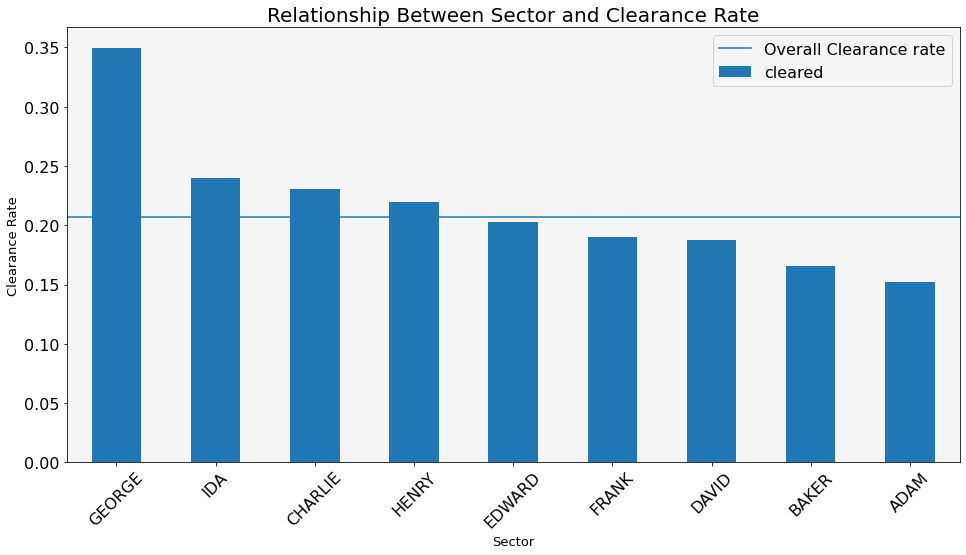

In [24]:
# Plot the relationship
plt.title("Relationship Between Sector and Clearance Rate", fontsize=20)
train.groupby('sector_name').cleared.mean().sort_values(ascending=False).plot.bar()
plt.axhline(clearance_rate, label="Overall Clearance rate")
plt.ylabel('Clearance Rate', fontsize=13)
plt.xlabel('Sector', fontsize=13)
plt.xticks(rotation = 45) #Rotating the xticks 45 degrees for readability
plt.legend()
None

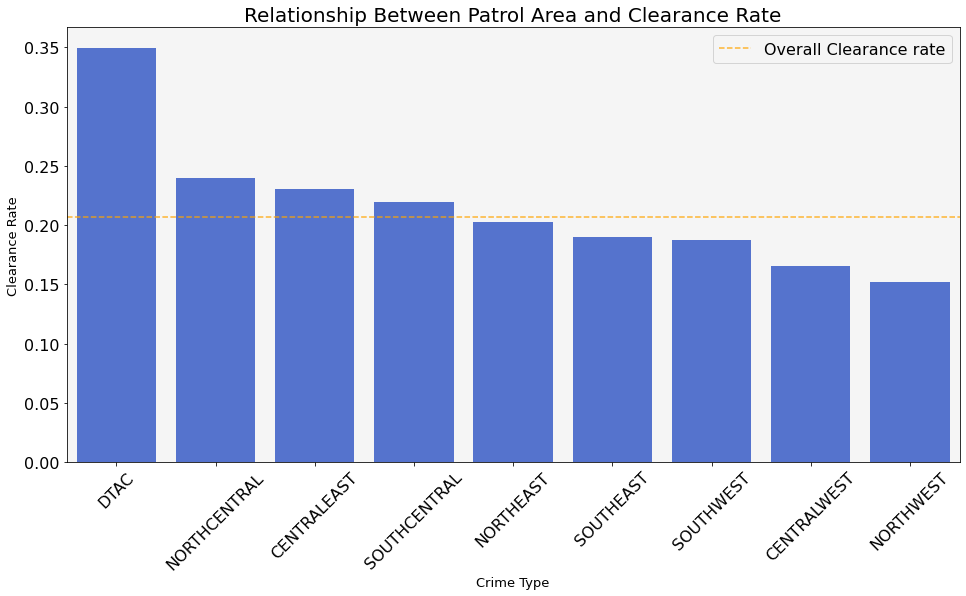

In [34]:
plt.title("Relationship Between Patrol Area and Clearance Rate", fontsize=20)
sns.barplot(x="patrol_area", y="cleared", data=train, color ='royalblue', ci=None, 
            order= ['DTAC', 'NORTHCENTRAL', 'CENTRALEAST', 'SOUTHCENTRAL', 'NORTHEAST',
                    'SOUTHEAST', 'SOUTHWEST', 'CENTRALWEST', 'NORTHWEST'])
plt.axhline(clearance_rate, label="Overall Clearance rate", linestyle = '--', alpha=.8, color='orange')
plt.ylabel('Clearance Rate', fontsize=13)
plt.xlabel('Crime Type', fontsize=13)
plt.xticks(rotation = 45) #Rotating the xticks 45 degrees for readability
plt.legend()
plt.show()

**The relationship here look almost exactly the same as with patrol area. They might represent the excact same area. Let's look at the exact numbers.**

In [26]:
train.groupby('sector_name').cleared.mean().sort_values(ascending=False)

sector_name
GEORGE     0.349474
IDA        0.239819
CHARLIE    0.230821
HENRY      0.219571
EDWARD     0.202532
FRANK      0.190250
DAVID      0.187789
BAKER      0.165204
ADAM       0.152290
Name: cleared, dtype: float64

In [27]:
train.groupby('patrol_area').cleared.mean().sort_values(ascending=False)

patrol_area
DTAC            0.349474
NORTHCENTRAL    0.239819
CENTRALEAST     0.230821
SOUTHCENTRAL    0.219571
NORTHEAST       0.202532
SOUTHEAST       0.190250
SOUTHWEST       0.187789
CENTRALWEST     0.165204
NORTHWEST       0.152290
Name: cleared, dtype: float64

**It looks like they do correlate exactly.**

### Question 3: Is clearance rate dependent on battalion_code?

**I'll run a quick chi^2 test to check the statistical dependency.**

$H0$: Battalion code and clearance are independent of eachother. 

$Ha$: Battalion code and clearance are dependent on eachother.

*Setting my confidence level at 95% which makes my alpha = .05*

In [28]:
chi2(train.battalion_code, target)

The chi2 value between the two variables is 2478.9257316578614 and the P-Value is 0.0.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


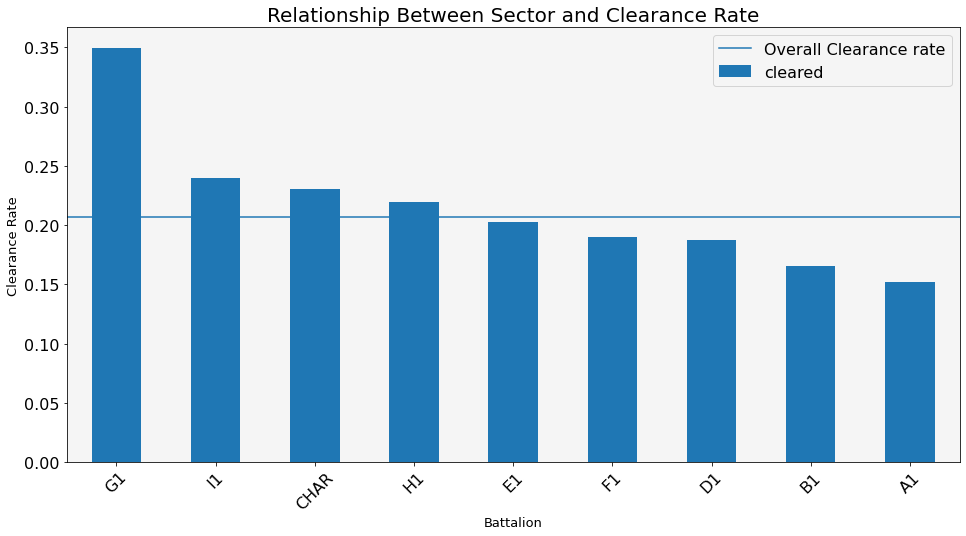

In [29]:
# Plot the relationship
plt.title("Relationship Between Sector and Clearance Rate", fontsize=20)
train.groupby('battalion_code').cleared.mean().sort_values(ascending=False).plot.bar()
plt.axhline(clearance_rate, label="Overall Clearance rate")
plt.ylabel('Clearance Rate', fontsize=13)
plt.xlabel('Battalion', fontsize=13)
plt.xticks(rotation = 45) #Rotating the xticks 45 degrees for readability
plt.legend()
None

**These also seem like they might mirror patrol area and sector.**

In [30]:
train.groupby('sector_name').cleared.mean().sort_values(ascending=False)

sector_name
GEORGE     0.349474
IDA        0.239819
CHARLIE    0.230821
HENRY      0.219571
EDWARD     0.202532
FRANK      0.190250
DAVID      0.187789
BAKER      0.165204
ADAM       0.152290
Name: cleared, dtype: float64

In [31]:
train.groupby('patrol_area').cleared.mean().sort_values(ascending=False)

patrol_area
DTAC            0.349474
NORTHCENTRAL    0.239819
CENTRALEAST     0.230821
SOUTHCENTRAL    0.219571
NORTHEAST       0.202532
SOUTHEAST       0.190250
SOUTHWEST       0.187789
CENTRALWEST     0.165204
NORTHWEST       0.152290
Name: cleared, dtype: float64

In [32]:
train.groupby('battalion_code').cleared.mean().sort_values(ascending=False)

battalion_code
G1      0.349474
I1      0.239819
CHAR    0.230821
H1      0.219571
E1      0.202532
F1      0.190250
D1      0.187789
B1      0.165204
A1      0.152290
Name: cleared, dtype: float64

**All three of these look like the exact same thing.**

## Let's make a better pie chart to visualize our top crimes -- this time with a new column instead of a subset

In [68]:
train.head()

,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,district,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,pd_district,the_geom,objectid,district_name,sort_order,battalion_id,jurisdiction_id,color,code,external_key,battalion_code,sector_name,input_date,modified_date,input_by,modified_by,bureau_name,patrol_area,command_phone_number,primary_key,shape_area,shape_length
245776,ASSAULT BY CONTACT FAM/DATING,Y,2020-01-03 03:40:00,2020-01-03,2020-01-03 03:40:00,2020-01-03,CAMP / CAMPGROUND,2600 MONTOPOLIS DR,78741.0,3.0,HENRY,4,30.218232,-97.708132,not cleared,2020-01-03,False,0 days 00:00:00,HENRY 4,MULTIPOLYGON (((-97.711351030891 30.2287459749...,13,HENRY 4,1,205,59,16711808,1300,1300,H1,HENRY,12/22/2014 11:31:16 AM +0000,10/09/2018 01:41:54 PM +0000,bmartinlimuel,APD_ADMIN,SOUTH,SOUTHCENTRAL,512-974-8106,59,4.523399e+07,27115.487629
244319,POSS CONTROLLED SUB/NARCOTIC,N,2021-05-22 23:45:00,2021-05-22,2021-05-22 23:45:00,2021-05-22,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,2207 WICKERSHAM LN,78741.0,3.0,HENRY,4,30.228991,-97.720629,cleared by arrest,2021-05-23,True,0 days 00:00:00,HENRY 4,MULTIPOLYGON (((-97.711351030891 30.2287459749...,13,HENRY 4,1,205,59,16711808,1300,1300,H1,HENRY,12/22/2014 11:31:16 AM +0000,10/09/2018 01:41:54 PM +0000,bmartinlimuel,APD_ADMIN,SOUTH,SOUTHCENTRAL,512-974-8106,59,4.523399e+07,27115.487629
56530,THEFT OF AUTO PARTS,N,2020-10-14 08:00:00,2020-10-14,2020-10-16 07:05:00,2020-10-16,PARKING /DROP LOT/ GARAGE,7705 METRO CENTER DR,78744.0,2.0,HENRY,6,30.216419,-97.690305,not cleared,2020-10-29,False,1 days 23:05:00,HENRY 6,MULTIPOLYGON (((-97.682787782506 30.2120013978...,69,HENRY 6,1,205,59,16711808,1302,1302,H1,HENRY,12/22/2014 11:31:16 AM +0000,10/09/2018 01:43:49 PM +0000,bmartinlimuel,APD_ADMIN,SOUTH,SOUTHCENTRAL,512-974-8106,80,8.660023e+07,45199.006624
122963,ASSAULT BY CONTACT,N,2019-12-22 09:23:00,2019-12-22,2019-12-22 09:23:00,2019-12-22,OTHER / UNKNOWN,7010 W SH 71,78735.0,8.0,DAVID,6,30.235801,-97.875994,not cleared,2019-12-26,False,0 days 00:00:00,DAVID 6,MULTIPOLYGON (((-97.881385230617 30.2626769868...,80,DAVID 6,1,164,12,16711680,1286,1286,D1,DAVID,12/22/2014 11:31:16 AM +0000,10/09/2018 01:44:21 PM +0000,bmartinlimuel,APD_ADMIN,SOUTH,SOUTHWEST,512-974-8100,86,2.691142e+08,92630.998389
291820,BURGLARY OF VEHICLE,N,2018-09-25 17:50:00,2018-09-25,2018-09-26 10:34:00,2018-09-26,PARKING /DROP LOT/ GARAGE,6205 BURNET RD,78757.0,7.0,IDA,7,30.337102,-97.739165,not cleared,2018-09-27,False,0 days 16:44:00,IDA 7,MULTIPOLYGON (((-97.723839441668 30.3719295278...,19,IDA 7,1,215,60,16711808,1305,1305,I1,IDA,12/22/2014 11:31:16 AM +0000,09/06/2018 08:54:50 AM +0000,bmartinlimuel,AP7657,CENTRAL,NORTHCENTRAL,512-974-5203,23,9.218470e+07,43885.566418


In [69]:
# top 10 crimes
train.crime_type.value_counts().head(10)

BURGLARY OF VEHICLE               19755
THEFT                             16794
FAMILY DISTURBANCE                14031
CRIMINAL MISCHIEF                 11003
ASSAULT W/INJURY-FAM/DATE VIOL     7266
AUTO THEFT                         7238
HARASSMENT                         5926
THEFT BY SHOPLIFTING               5678
ASSAULT WITH INJURY                5443
DWI                                4436
Name: crime_type, dtype: int64

**I'll have to make a new column that is a copy but label every other crime not in top 10 as 'other'.**

In [71]:
train['top_10_crimes'] = train.crime_type
train.top_10_crimes.value_counts().head(11)

BURGLARY OF VEHICLE               19755
THEFT                             16794
FAMILY DISTURBANCE                14031
CRIMINAL MISCHIEF                 11003
ASSAULT W/INJURY-FAM/DATE VIOL     7266
AUTO THEFT                         7238
HARASSMENT                         5926
THEFT BY SHOPLIFTING               5678
ASSAULT WITH INJURY                5443
DWI                                4436
BURGLARY OF RESIDENCE              4254
Name: top_10_crimes, dtype: int64

In [80]:
top_10_list = ['DWI', 'ASSAULT WITH INJURY', 'THEFT BY SHOPLIFTING', 'HARASSMENT', 
                 'AUTO THEFT', 'ASSAULT W/INJURY-FAM/DATE VIOL', 'CRIMINAL MISCHIEF', 
                 'FAMILY DISTURBANCE', 'THEFT', 'BURGLARY OF VEHICLE']

train = train[train.crime_type.isin(top_10_list)]
    

KeyError: 'DWI'

In [ ]:
  null_columns = [
    'clearance_status',
    'clearance_date',
    'zip_code',
    'sector',
    'district',
    'latitude',
    'longitude']
    
    for column in null_columns:
        df = df[~df[column].isna()]

    return df